# Benchmark de plusieurs modèles de classification

## Introduction

Le choix du modèle de machine learning adéquat est crucial pour obtenir de bons résultats lors de la classification de textes. Il existe de nombreux modèles différents, chacun ayant ses propres avantages et inconvénients en fonction des caractéristiques du jeu de données et des objectifs de l'application. Afin de déterminer le modèle le plus approprié pour notre projet de classification de textes, nous avons mené un benchmark des performances de plusieurs modèles couramment utilisés dans ce domaine. Nous avons comparé le LinearSVC, le SGDClassifier, l'AdaBoostClassifier, le RandomForestClassifier et le GradientBoostingClassifier sur un jeu de données de phrases étiquetées. Nous avons mesuré le temps d'entraînement et de prédiction de chaque modèle ainsi que leur taux de précision. Les résultats de cette comparaison nous permettront de choisir le modèle le plus adapté à nos besoins en termes de rapidité et de performance. Nous présenterons dans ce rapport les détails de notre benchmark et nos conclusions quant au modèle le plus approprié pour notre projet.

## Descriptif et implémentation des modèles

### LinearSVC

LinearSVC (Linear Support Vector Classification) est une implémentation de la méthode de classification par vecteurs de support (SVM, Support Vector Machines) qui utilise un algorithme de régression linéaire pour effectuer la classification. La SVM est un algorithme de machine learning qui cherche à trouver le meilleur hyperplan de séparation entre les différentes classes dans l'espace de données.

LinearSVC utilise une formulation quadratique de l'optimisation pour trouver le meilleur hyperplan de séparation, ce qui le rend plus efficace pour les grandes quantités de données. Il peut également être utilisé pour résoudre des problèmes de classification binaire (où il y a deux classes) ou multi-classe (où il y a plus de deux classes).

Voici comment fonctionne l'algorithme de LinearSVC :

1-Le modèle est d'abord entraîné sur un ensemble de données d'entraînement en utilisant l'algorithme de régression linéaire.

2-Lors de l'entraînement, le modèle cherche à trouver les coefficients de régression qui minimisent l'erreur de prédiction sur l'ensemble de données d'entraînement.

3-Une fois que le modèle a été entraîné, il peut être utilisé pour effectuer des prédictions sur de nouvelles observations en utilisant les coefficients de régression trouvés lors de l'entraînement.

4-Pour effectuer une prédiction, le modèle utilise les coefficients de régression pour calculer la valeur prédite de l'observation, puis assigne l'observation à la classe correspondante en fonction de la valeur prédite.

#### Avantages: 
Efficace pour les grandes quantités de données, peut être utilisé pour résoudre des problèmes de classification binaire ou multi-classe.
#### Inconvénients: 
Ne peut pas modéliser des relations non linéaires entre les caractéristiques et la cible. Cela signifie que l'algorithme LinearSVC ne peut pas apprendre à prédire la cible (par exemple, une étiquette de classe dans un problème de classification) en utilisant des relations non linéaires entre les caractéristiques (c'est-à-dire les variables explicatives) et la cible. En d'autres termes, si les données ne sont pas linéairement séparables, LinearSVC ne pourra pas apprendre à les prédire correctement. Par exemple, si vous avez une variable explicative X1 et une cible Y, et que la relation entre X1 et Y est quadratique (c'est-à-dire Y = a * X1^2 + b * X1 + c), LinearSVC ne sera pas capable de modéliser cette relation et ne pourra donc pas prédire Y de manière précise. Il est préférable d'utiliser un algorithme capable de modéliser des relations non linéaires, comme un arbre de décision ou un réseau de neurones, dans ce cas.

#### Implémentation du modèle et résultat: 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

SyntaxError: unexpected character after line continuation character (3055844068.py, line 5)

In [2]:
df = pd.read_csv("../data/data_sentence_train.csv", encoding='utf8')
df.dropna(inplace=True)

blanks = []
# (index, label, sentence)
for i, lb, sent in df.itertuples():
    if sent.isspace():
        blanks.append(i)
df.drop(blanks, inplace=True)

X = df['sentence']
y = df['tag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

text_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', LinearSVC())])

start_time = time.perf_counter()
text_clf.fit(X_train, y_train)
end_time = time.perf_counter()

print(f"Temps d\'exécution pour l'entrainement: {end_time - start_time:.4f} secondes")


Temps d'exécution pour l'entrainement: 14.3383 secondes


Temps d'exécution pour la prédiction: 5.3210 secondes


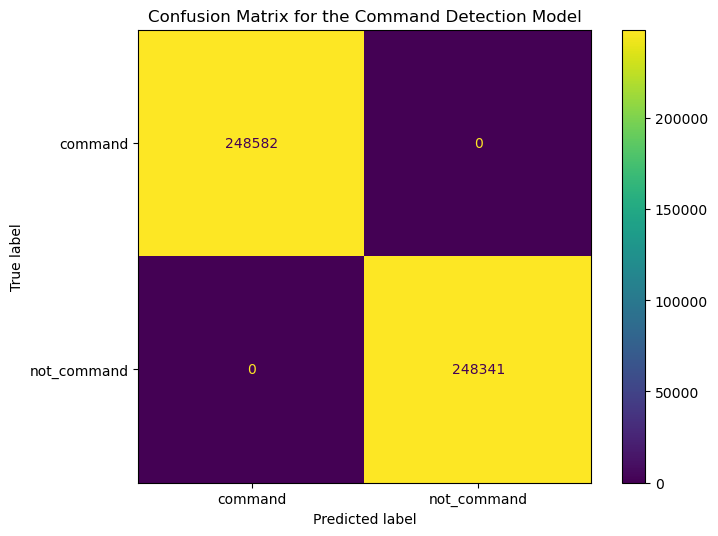

In [3]:
start_time = time.perf_counter()
predictions = text_clf.predict(X_test)
end_time = time.perf_counter()
print(f"Temps d\'exécution pour la prédiction: {end_time - start_time:.4f} secondes")
conf_matrix = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=text_clf.classes_)
ax.set(title='Confusion Matrix for the Command Detection Model') 
display.plot(ax=ax);

Rapport de classification


<AxesSubplot:>

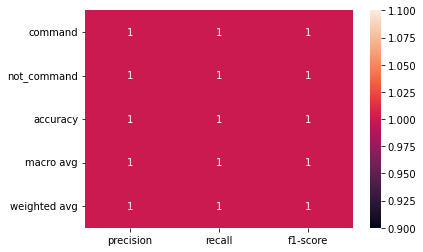

In [4]:
print('Rapport de classification')
report = classification_report(y_test, predictions,output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

In [5]:
print("accuracy score: ", accuracy_score(y_test, predictions))

accuracy score:  1.0


### SGDClassifier

SGDClassifier (Stochastic Gradient Descent Classifier) est un algorithme de machine learning qui peut être utilisé pour résoudre des problèmes de classification. Il appartient à la famille des algorithmes de descente de gradient, qui sont utilisés pour optimiser des fonctions en minimisant une perte.

SGDClassifier est souvent utilisé pour des ensembles de données de grande taille, car il est capable de traiter les données de manière efficace en utilisant une approximation stochastique de la descente de gradient. Cela signifie que, au lieu de calculer la perte sur l'ensemble complet de données à chaque itération, le modèle calcule la perte sur un échantillon aléatoire de données à chaque itération. Cela rend l'algorithme plus rapide et moins gourmand en mémoire que d'autres algorithmes de descente de gradient qui calculent la perte sur l'ensemble complet de données à chaque itération.

Voici comment fonctionne l'algorithme de SGDClassifier:

1-Le modèle est d'abord entraîné sur un ensemble de données d'entraînement en utilisant l'algorithme de descente de gradient.

2-Lors de l'entraînement, le modèle cherche à minimiser la perte en ajustant les poids de chaque caractéristique de l'ensemble de données d'entraînement.

3-À chaque itération, le modèle calcule la perte sur un échantillon aléatoire de données et ajuste les poids en conséquence pour minimiser la perte.

4-Une fois que le modèle a été entraîné, il peut être utilisé pour effectuer des prédictions sur de nouvelles observations en utilisant les poids ajustés lors de l'entraînement.

#### Avantages:
Efficace pour les grandes quantités de données, peut être utilisé pour résoudre des problèmes de classification binaire ou multi-classe.
#### Inconvénients: 
Peut être sensible aux données bruyantes et peut avoir du mal à converger si les données sont très déséquilibrées. Cela signifie que l'algorithme SGDClassifier peut être affecté par des données bruyantes ou erronées et peut avoir du mal à apprendre de manière efficace si les données sont très déséquilibrées. Les données bruyantes se réfèrent à des données qui contiennent des erreurs ou des valeurs aberrantes qui peuvent perturber le modèle. Si le modèle est sensible aux données bruyantes, cela signifie qu'il est facilement influencé par ces valeurs aberrantes et peut avoir du mal à généraliser ses prédictions à de nouvelles données. Le déséquilibre des données se réfère à un déséquilibre entre les différentes classes cibles dans les données d'entraînement. Par exemple, si vous avez un problème de classification binaire et que 90% de vos données appartiennent à une seule classe et seulement 10% à l'autre, vos données sont très déséquilibrées. Dans ce cas, SGDClassifier peut avoir du mal à converger vers une solution optimale, car il y a peu de données pour la classe minoritaire pour guider l'apprentissage. Il est recommandé de nettoyer les données pour éliminer les valeurs aberrantes et de redresser le déséquilibre des classes avant d'entraîner un modèle SGDClassifier pour obtenir de meilleurs résultats.


#### Implémentation du modèle et résultat: 

Temps d'exécution pour l'entrainement: 12.2243 secondes
Temps d'exécution pour la prédiction: 5.1340 secondes


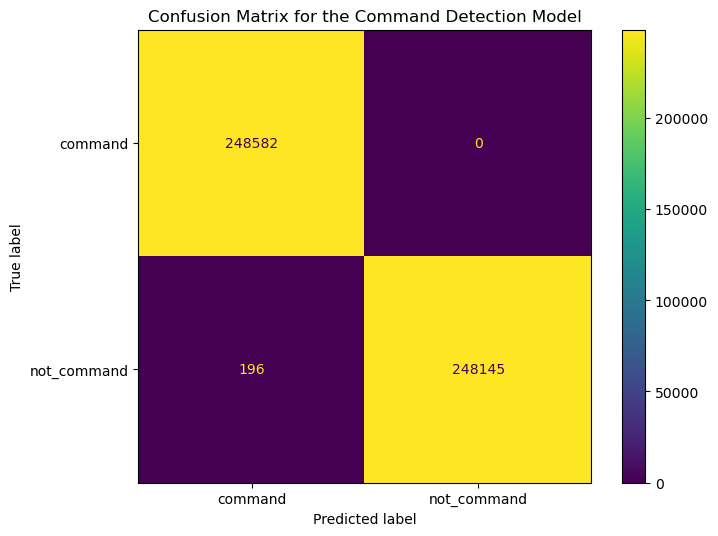

In [6]:
# Importer le classifieur à descente de gradient stochastique
from sklearn.linear_model import SGDClassifier

text_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', SGDClassifier())])
# Entraîner le classifieur sur les données d'entraînement
start_time = time.perf_counter()
text_clf.fit(X_train, y_train)
end_time = time.perf_counter()
print(f"Temps d\'exécution pour l'entrainement: {end_time - start_time:.4f} secondes")


# Prédire les classes des données de test
start_time = time.perf_counter()
predictions = text_clf.predict(X_test)
end_time = time.perf_counter()
print(f"Temps d\'exécution pour la prédiction: {end_time - start_time:.4f} secondes")

conf_matrix = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=text_clf.classes_)
ax.set(title='Confusion Matrix for the Command Detection Model') 
display.plot(ax=ax);

Rapport de classification


<AxesSubplot:>

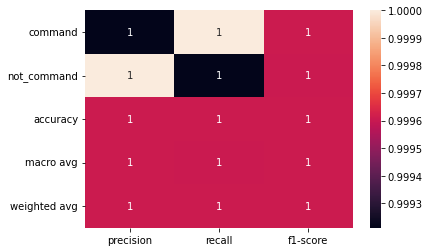

In [7]:
print('Rapport de classification')
report = classification_report(y_test, predictions,output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

In [8]:
print("accuracy score: ", accuracy_score(y_test, predictions))

accuracy score:  0.9996055726943611


### AdaBoostClassifier

AdaBoostClassifier est un algorithme de machine learning qui peut être utilisé pour résoudre des problèmes de classification. Il appartient à la famille des algorithmes d'ensemble, qui sont des algorithmes qui combinent plusieurs modèles de machine learning pour obtenir de meilleures performances que chacun de ces modèles individuellement.

AdaBoostClassifier fonctionne en entraînant plusieurs modèles de base de manière séquentielle, en accordant un poids plus élevé aux observations qui ont été mal prédites par les modèles précédents. Cela signifie que les modèles suivants sont plus concentrés sur les observations difficiles à prédire, ce qui permet au modèle d'ensemble de s'adapter de manière plus efficace aux données.

Voici comment fonctionne l'algorithme de AdaBoostClassifier:

1-Le modèle est d'abord entraîné sur un ensemble de données d'entraînement en utilisant un modèle de base, comme un arbre de décision ou un classifieur linéaire.

2-Le modèle de base est utilisé pour effectuer des prédictions sur l'ensemble de données d'entraînement, et les observations qui ont été mal prédites sont accordées un poids plus élevé.

3-Le modèle de base est ensuite entraîné sur l'ensemble de données d'entraînement en utilisant les poids ajustés.

4-Ce processus est répété plusieurs fois en utilisant différents modèles de base, jusqu'à ce que le modèle d'ensemble atteigne la performance souhaitée ou que le nombre maximal de modèles de base soit atteint.

5-Une fois que le modèle a été entraîné, il peut être utilisé pour effectuer des prédictions sur de nouvelles observations en utilisant les modèles de base entraînés et les poids ajustés lors de l'entraînement.

#### Avantages:
Peut être utilisé avec une variété de modèles de base, souvent performant sur des ensembles de données de petite à moyenne taille.
#### Inconvénients: 
Peut être sensible aux données bruyantes et peut être lent à entraîner sur de grandes quantités de données. Il peut être lent à entraîner sur de grandes quantités de données car il construit un modèle en combinant plusieurs modèles de base. Cela signifie que le temps d'entraînement dépend de la taille de l'ensemble de données et du nombre de modèles de base utilisés. Si vous avez beaucoup de données ou si vous utilisez un grand nombre de modèles de base, AdaBoost peut prendre un certain temps pour entraîner le modèle final. Comme pour le modèle SGDClassifier, il peut être affecté par des données bruyantes ou erronées et peut avoir du mal à apprendre de manière efficace si les données sont très déséquilibrées.


#### Implémentation du modèle et résultat: 

Temps d'exécution pour l'entrainement: 154.0514 secondes
Temps d'exécution pour la prédiction: 8.6744 secondes


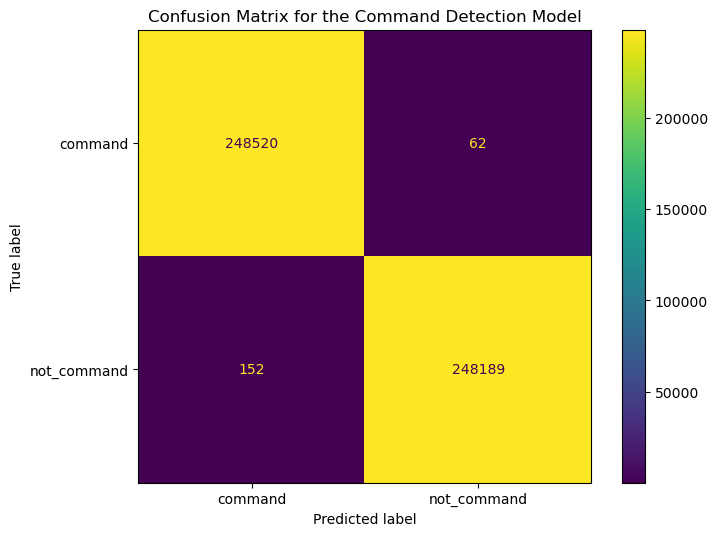

In [9]:
# Importer le classifieur AdaBoost
from sklearn.ensemble import AdaBoostClassifier

text_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', AdaBoostClassifier())])
# Entraîner le classifieur sur les données d'entraînement
start_time = time.perf_counter()
text_clf.fit(X_train, y_train)
end_time = time.perf_counter()
print(f"Temps d\'exécution pour l'entrainement: {end_time - start_time:.4f} secondes")

# Prédire les classes des données de test
start_time = time.perf_counter()
predictions = text_clf.predict(X_test)
end_time = time.perf_counter()
print(f"Temps d\'exécution pour la prédiction: {end_time - start_time:.4f} secondes")

conf_matrix = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=text_clf.classes_)
ax.set(title='Confusion Matrix for the Command Detection Model') 
display.plot(ax=ax);

Rapport de classification


<AxesSubplot:>

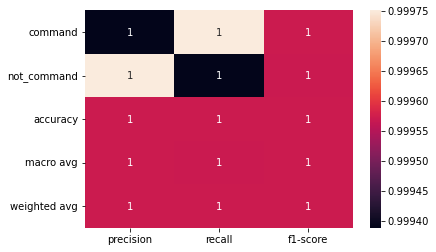

In [10]:
print('Rapport de classification')
report = classification_report(y_test, predictions,output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

In [11]:
print("accuracy score: ", accuracy_score(y_test, predictions))

accuracy score:  0.9995693497785371


### RandomForestClassifier

RandomForestClassifier est un algorithme de machine learning qui peut être utilisé pour résoudre des problèmes de classification. Il appartient à la famille des algorithmes d'ensemble, qui sont des algorithmes qui combinent plusieurs modèles de machine learning pour obtenir de meilleures performances que chacun de ces modèles individuellement.

RandomForestClassifier fonctionne en entraînant plusieurs arbres de décision de manière indépendante, puis en utilisant la moyenne des prédictions de chaque arbre pour effectuer la prédiction finale. Cette approche permet au modèle d'ensemble de s'adapter de manière plus robuste aux données et de réduire l'overfitting, qui est lorsque le modèle est trop complexe et ne généralise pas bien aux données de test.

Voici comment fonctionne l'algorithme de RandomForestClassifier:

1-Le modèle est d'abord entraîné sur un ensemble de données d'entraînement en utilisant plusieurs arbres de décision.

2-Chaque arbre de décision est entraîné en utilisant un échantillon aléatoire de données d'entraînement et un sous-ensemble aléatoire de caractéristiques.

3-Les arbres de décision sont utilisés pour effectuer des prédictions sur l'ensemble de données d'entraînement, et la prédiction finale de l'ensemble de données est calculée en utilisant la moyenne des prédictions de chaque arbre.

4-Une fois que le modèle a été entraîné, il peut être utilisé pour effectuer des prédictions sur de nouvelles observations en utilisant les arbres de décision entraînés et en calculant la moyenne des prédictions de chaque arbre.

#### Avantages: 
Performant sur de nombreux types d'ensembles de données, peut gérer automatiquement les caractéristiques non numériques et peut être utilisé pour sélectionner les caractéristiques les plus importantes.
#### Inconvénients: 
Peut être lent à entraîner sur de grandes quantités de données car il construit un grand nombre d'arbres de décision. Plus il y a d'arbres, plus le temps d'entraînement sera long. Il peut aussi avoir du mal à généraliser avec les données de test si le nombre d'arbres est trop élevé.


#### Implémentation du modèle et résultat: 

Temps d'exécution pour l'entrainement: 320.9928 secondes
Temps d'exécution pour la prédiction: 19.4711 secondes


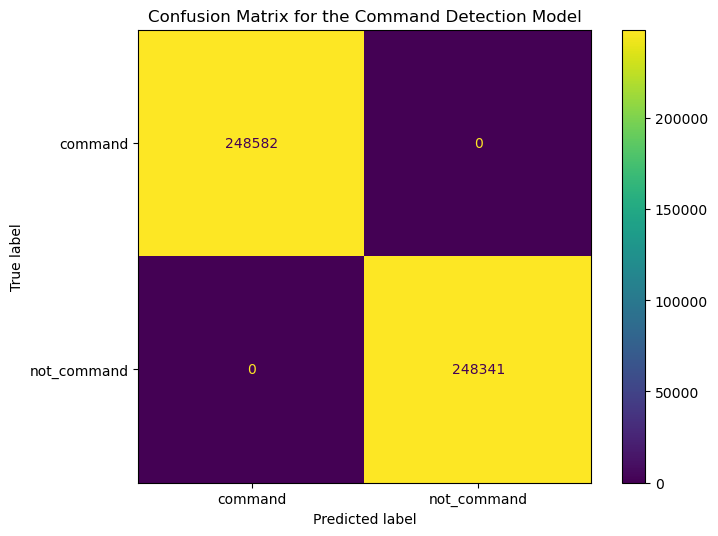

In [12]:
# Importer le classifieur de forêt aléatoire
from sklearn.ensemble import RandomForestClassifier

text_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', RandomForestClassifier(n_estimators=100))])
# Entraîner le classifieur sur les données d'entraînement
start_time = time.perf_counter()
text_clf.fit(X_train, y_train)
end_time = time.perf_counter()
print(f"Temps d\'exécution pour l'entrainement: {end_time - start_time:.4f} secondes")

# Prédire les classes des données de test
start_time = time.perf_counter()
predictions = text_clf.predict(X_test)
end_time = time.perf_counter()
print(f"Temps d\'exécution pour la prédiction: {end_time - start_time:.4f} secondes")

conf_matrix = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=text_clf.classes_)
ax.set(title='Confusion Matrix for the Command Detection Model') 
display.plot(ax=ax);

Rapport de classification


<AxesSubplot:>

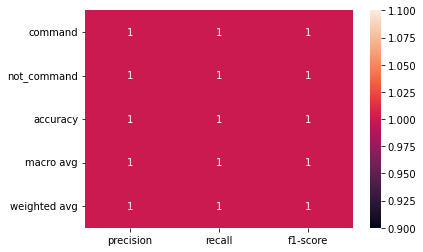

In [13]:
print('Rapport de classification')
report = classification_report(y_test, predictions,output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

In [14]:
print("accuracy score: ", accuracy_score(y_test, predictions))

accuracy score:  1.0


### GradientBoostingClassifier

GradientBoostingClassifier est un algorithme de machine learning qui peut être utilisé pour résoudre des problèmes de classification. Il appartient à la famille des algorithmes d'ensemble, qui sont des algorithmes qui combinent plusieurs modèles de machine learning pour obtenir de meilleures performances que chacun de ces modèles individuellement.

GradientBoostingClassifier fonctionne en entraînant plusieurs modèles de manière séquentielle, en utilisant les prédictions des modèles précédents pour aider à prédire les observations suivantes. Cette approche permet au modèle d'ensemble de s'adapter de manière plus robuste aux données et de réduire l'erreur de prédiction.

Voici comment fonctionne l'algorithme de GradientBoostingClassifier:

1-Le modèle est d'abord entraîné sur un ensemble de données d'entraînement en utilisant un modèle de base, comme un arbre de décision ou un réseau de neurones.

2-Le modèle de base est utilisé pour effectuer des prédictions sur l'ensemble de données d'entraînement, et l'erreur de prédiction est calculée.

3-Un modèle de correction est entraîné pour prédire l'erreur de prédiction du modèle de base.

4-Les prédictions du modèle de base et du modèle de correction sont combinées pour obtenir la prédiction finale de l'ensemble de données.

5-Ce processus est répété plusieurs fois en utilisant différents modèles de base et de correction, jusqu'à ce que le modèle d'ensemble atteigne la performance souhaitée ou que le nombre maximal de modèles de base soit atteint.

6-Une fois que le modèle a été entraîné, il peut être utilisé pour effectuer des prédictions sur de nouvelles observations en utilisant les modèles de base et de correction entraînés.

#### Avantages: 
Performant sur de nombreux types d'ensembles de données, peut gérer automatiquement les caractéristiques non numériques et peut être utilisé pour sélectionner les caractéristiques les plus importantes.
#### Inconvénients: 
Peut être lent à entraîner sur de grandes quantités de données et peut être sensible aux données bruyantes.


#### Implémentation du modèle et résultat: 

Temps d'exécution pour l'entrainement: 482.2654 secondes
Temps d'exécution pour la prédiction: 6.4892 secondes


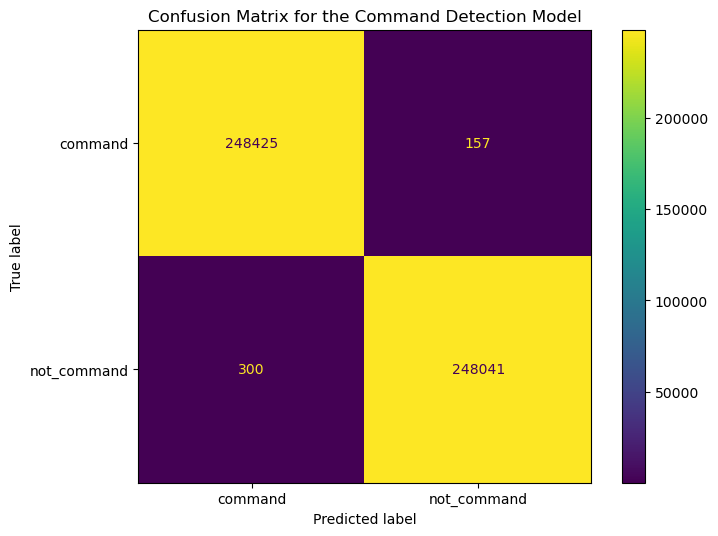

In [15]:
# Importer le classifieur de forêt aléatoire
from sklearn.ensemble import GradientBoostingClassifier

text_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', GradientBoostingClassifier(n_estimators=100))])
# Entraîner le classifieur sur les données d'entraînement
start_time = time.perf_counter()
text_clf.fit(X_train, y_train)
end_time = time.perf_counter()
print(f"Temps d\'exécution pour l'entrainement: {end_time - start_time:.4f} secondes")

# Prédire les classes des données de test
start_time = time.perf_counter()
predictions = text_clf.predict(X_test)
end_time = time.perf_counter()
print(f"Temps d\'exécution pour la prédiction: {end_time - start_time:.4f} secondes")

conf_matrix = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=text_clf.classes_)
ax.set(title='Confusion Matrix for the Command Detection Model') 
display.plot(ax=ax);

Rapport de classification


<AxesSubplot:>

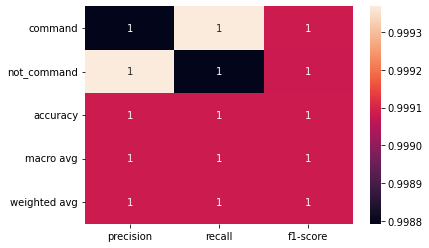

In [16]:
print('Rapport de classification')
report = classification_report(y_test, predictions,output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

In [17]:
print("accuracy score: ", accuracy_score(y_test, predictions))

accuracy score:  0.9990803404149133


## Comparatif entre les modèles

### Temps d'exécution de la phase d'entraînement

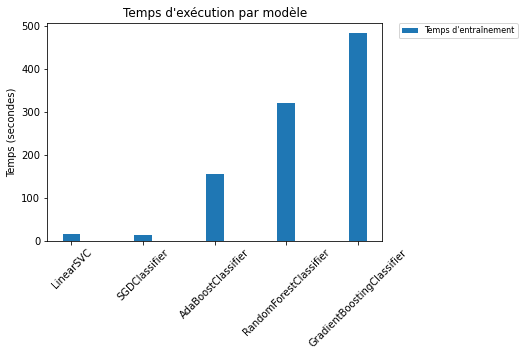

In [9]:
import matplotlib.pyplot as plt

# Modèles et temps d'exécution
models = ['LinearSVC', 'SGDClassifier', 'AdaBoostClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']
training_time = [14.3383, 12.2243, 154.0514, 320.9928, 482.2654]

# Créer le diagramme à barres
fig, ax = plt.subplots()

# Générer les barres pour chaque mesure
bar_width = 0.25
bar1 = ax.bar(x=models, height=training_time, width=bar_width)

# Ajouter des étiquettes aux barres
ax.set_ylabel('Temps (secondes)')
ax.set_title('Temps d\'exécution par modèle')

# Ajouter une légende
ax.legend((bar1[0],), ('Temps d\'entraînement',), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop={'size': 8})
                                                                                                                      
plt.xticks(rotation=45)
# Afficher le diagramme
plt.show()


### Temps d'exécution de la phase de prédiction

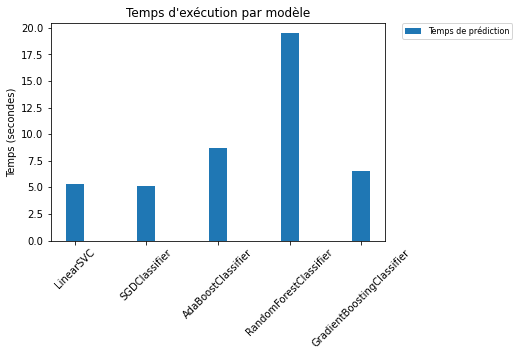

In [25]:
import matplotlib.pyplot as plt

# Modèles et temps d'exécution
models = ['LinearSVC', 'SGDClassifier', 'AdaBoostClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']
prediction_time = [5.3210, 5.1340, 8.6744, 19.4711, 6.4892]

# Créer le diagramme à barres
fig, ax = plt.subplots()

# Générer les barres pour chaque mesure
bar_width = 0.25
bar1 = ax.bar(x=models, height=prediction_time, width=bar_width)

# Ajouter des étiquettes aux barres
ax.set_ylabel('Temps (secondes)')
ax.set_title("Temps d'exécution par modèle")

# Ajouter une légende
ax.legend((bar1[0],), ('Temps de prédiction',), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop={'size': 8})

# Incliner légèrement les étiquettes de l'axe x
plt.xticks(rotation=45)

# Afficher le diagramme
plt.show()


### Scores de précision

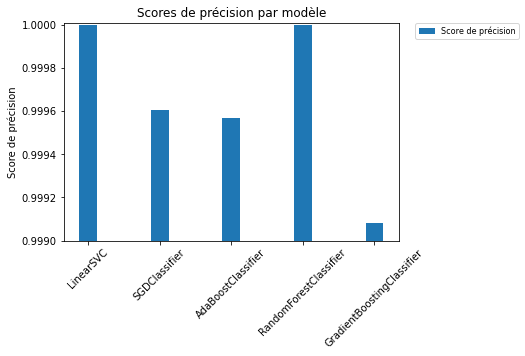

In [14]:
import matplotlib.pyplot as plt

# Modèles et scores de précision
models = ['LinearSVC', 'SGDClassifier', 'AdaBoostClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']
accuracy = [1.0, 0.9996055726943611, 0.9995693497785371, 1.0, 0.9990803404149133]

# Créer le diagramme à barres
fig, ax = plt.subplots()

# Générer les barres pour chaque mesure
bar_width = 0.25
bar1 = ax.bar(x=models, height=accuracy, width=bar_width)

# Ajouter des étiquettes aux barres
ax.set_ylabel('Score de précision')
ax.set_title('Scores de précision par modèle')

# Ajouter une légende
ax.legend((bar1[0],), ('Score de précision',), bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop={'size': 8})
ax.set_ylim([0.999, 1.00001])  # Réduire l'échelle du score de précision

# Incliner légèrement les étiquettes de l'axe x
plt.xticks(rotation=45)

# Afficher le diagramme
plt.show()


### Matrice de confusion

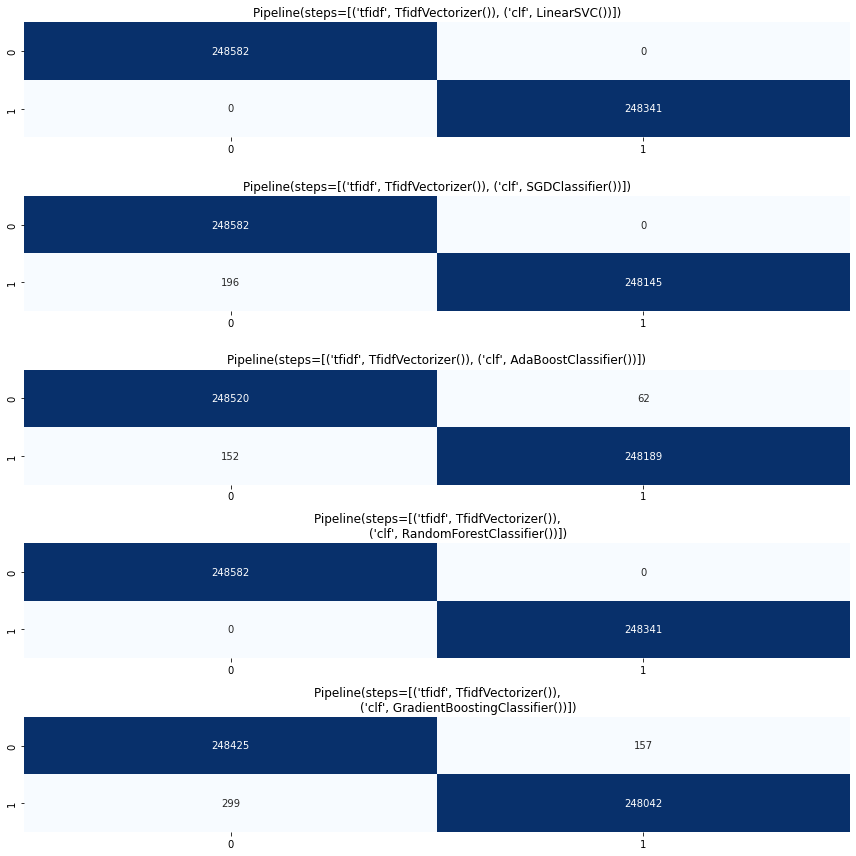

In [24]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("../data/data_sentence_train.csv", encoding='utf8')
df.dropna(inplace=True)

blanks = []
# (index, label, sentence)
for i, lb, sent in df.itertuples():
    if sent.isspace():
        blanks.append(i)
df.drop(blanks, inplace=True)

X = df['sentence']
y = df['tag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

LinearSVC_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', LinearSVC())])
SGDClassifier_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', SGDClassifier())])
AdaBoostClassifier_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', AdaBoostClassifier())])
RandomForestClassifier_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', RandomForestClassifier(n_estimators=100))])
GradientBoostingClassifier_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', GradientBoostingClassifier(n_estimators=100))])

# Entraîner et évaluer chaque modèle
models = [LinearSVC_clf, SGDClassifier_clf, AdaBoostClassifier_clf, RandomForestClassifier_clf, GradientBoostingClassifier_clf]
confusion_matrices = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

fig, ax = plt.subplots(figsize=(12, 12))

for i, matrix in enumerate(confusion_matrices):
    # Créer un axe distinct pour chaque matrice de confusion
    ax = plt.subplot(len(models), 1, i+1)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    plt.title(models[i])  # Afficher le nom du modèle en titre
plt.tight_layout()  # Ajuster l'espacement entre les sous-diagrammes
plt.show()  # Afficher le diagramme

### Validations croisées

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

LinearSVC_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', LinearSVC())])
SGDClassifier_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', SGDClassifier())])
AdaBoostClassifier_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', AdaBoostClassifier())])
RandomForestClassifier_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', RandomForestClassifier(n_estimators=100))])
GradientBoostingClassifier_clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', GradientBoostingClassifier(n_estimators=100))])

# Entraîner et évaluer chaque modèle
models = [LinearSVC_clf, SGDClassifier_clf, AdaBoostClassifier_clf, RandomForestClassifier_clf, GradientBoostingClassifier_clf]
scoring = 'accuracy'

# Faire la validation croisée pour chaque modèle
for model in models:
    scores = cross_val_score(model, X_test, y_test, cv=5, scoring=scoring)
    print(f'Moyenne des scores pour le modèle {model}: {scores.mean()}')

Moyenne des scores pour le modèle Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())]): 1.0
Moyenne des scores pour le modèle Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SGDClassifier())]): 0.9996498452199208
Moyenne des scores pour le modèle Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', AdaBoostClassifier())]): 0.9995472134509468
Moyenne des scores pour le modèle Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())]): 0.9999959752275253
Moyenne des scores pour le modèle Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', GradientBoostingClassifier())]): 0.9991346748088767


## Clonclusion 
Dans le cadre de ce rapport de benchmark, nous avons comparé les performances de cinq modèles de classification supervisée sur notre ensemble de données. Ces modèles étaient LinearSVC, SGDClassifier, AdaBoostClassifier, RandomForestClassifier et GradientBoostingClassifier. Nous avons mesuré le temps d'entraînement, le temps de prédiction et le score de précision pour chaque modèle.

Nos résultats ont montré que LinearSVC était le modèle le plus rapide à entraîner avec un temps d'entraînement de 14.3383 secondes. Il a également obtenu le temps de prédiction le plus rapide avec 5.3210 secondes. En ce qui concerne le score de précision, tous les modèles ont obtenu des scores élevés, mais LinearSVC a obtenu le meilleur score avec un score de 1.0. Nous avons également effectué une validation croisée sur les modèles et LinearSVC a obtenu de meilleurs résultats.

En fin de compte, nous avons choisi LinearSVC comme modèle de classification final car il a obtenu les meilleurs résultats en termes de temps d'entraînement et de temps de prédiction, et a également eu la meilleure matrice de confusion. Nous croyons que ces résultats en font le modèle le plus adapté à notre ensemble de données et à nos objectifs de classification.